## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [3]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2019-12-28 20:52:21--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.147.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.147.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  57.8MB/s    in 5.7s    

2019-12-28 20:52:27 (57.0 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [4]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [5]:
## TODO: Define the Net in models.py


import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import *

net = AlexNet()
print(net)

/home/workspace/models.py:54: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight = nn.init.xavier_uniform(m.weight, gain=1)
/home/workspace/models.py:57: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight = nn.init.xavier_uniform(m.weight, gain=1)


AlexNet(
  (conv1): Conv2d(1, 96, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=136, bias=True)
  (dropout2): Dropout(p=0.2)
  (dropout4): Dropout(p=0.4)
  (dropout6): Dropout(p=0.6)
  (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_runn

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [8]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
train_data_transform = transforms.Compose([Rescale((250, 250)), \
                                           RandomCrop((227, 227)), \
                                           Normalize(), \
                                           ToTensor()])

test_data_transform = transforms.Compose([Rescale((227, 227)), \
                                          Normalize(), \
                                          ToTensor()])

# testing that you've defined a transform
assert(train_data_transform is not None), 'Define a data_transform'

In [9]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=train_data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 227, 227]) torch.Size([68, 2])
1 torch.Size([1, 227, 227]) torch.Size([68, 2])
2 torch.Size([1, 227, 227]) torch.Size([68, 2])
3 torch.Size([1, 227, 227]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [10]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [11]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=test_data_transform)



In [12]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
def net_sample_output():
    net.eval()
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']
        
        # key_pts do not need to be wrapped until they are used for training
        images = Variable(images, volatile=True)

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net.forward(images)

        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


torch.Size([10, 1, 227, 227])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

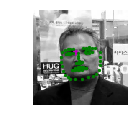

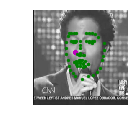

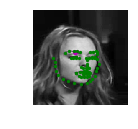

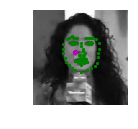

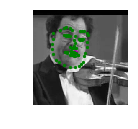

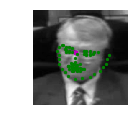

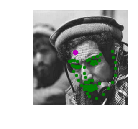

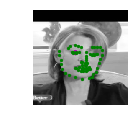

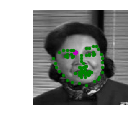

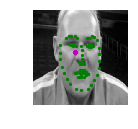

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.SmoothL1Loss()

optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [14]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [15]:
# train your network
n_epochs = 20 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.7588596820831299
Epoch: 1, Batch: 20, Avg. Loss: 0.6726164221763611
Epoch: 1, Batch: 30, Avg. Loss: 0.5968566715717316
Epoch: 1, Batch: 40, Avg. Loss: 0.5323034584522247
Epoch: 1, Batch: 50, Avg. Loss: 0.4642108231782913
Epoch: 1, Batch: 60, Avg. Loss: 0.45102261006832123
Epoch: 1, Batch: 70, Avg. Loss: 0.4501637428998947
Epoch: 1, Batch: 80, Avg. Loss: 0.42944701611995695
Epoch: 1, Batch: 90, Avg. Loss: 0.42235504686832426
Epoch: 1, Batch: 100, Avg. Loss: 0.40414179265499117
Epoch: 1, Batch: 110, Avg. Loss: 0.4038292199373245
Epoch: 1, Batch: 120, Avg. Loss: 0.38315989077091217
Epoch: 1, Batch: 130, Avg. Loss: 0.37512876391410827
Epoch: 1, Batch: 140, Avg. Loss: 0.3822652667760849
Epoch: 1, Batch: 150, Avg. Loss: 0.36618844866752626
Epoch: 1, Batch: 160, Avg. Loss: 0.368960240483284
Epoch: 1, Batch: 170, Avg. Loss: 0.3565987914800644
Epoch: 1, Batch: 180, Avg. Loss: 0.37224757969379424
Epoch: 1, Batch: 190, Avg. Loss: 0.3385462760925293
Epoch: 1, Batc

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.2791948437690735
Epoch: 2, Batch: 20, Avg. Loss: 0.2738503396511078
Epoch: 2, Batch: 30, Avg. Loss: 0.2677304059267044
Epoch: 2, Batch: 40, Avg. Loss: 0.27472005486488343
Epoch: 2, Batch: 50, Avg. Loss: 0.27933409065008163
Epoch: 2, Batch: 60, Avg. Loss: 0.25775637924671174
Epoch: 2, Batch: 70, Avg. Loss: 0.2568714380264282
Epoch: 2, Batch: 80, Avg. Loss: 0.2482634112238884
Epoch: 2, Batch: 90, Avg. Loss: 0.26240118592977524
Epoch: 2, Batch: 100, Avg. Loss: 0.25395368188619616
Epoch: 2, Batch: 110, Avg. Loss: 0.2508593678474426
Epoch: 2, Batch: 120, Avg. Loss: 0.24214725494384765
Epoch: 2, Batch: 130, Avg. Loss: 0.24239905774593354
Epoch: 2, Batch: 140, Avg. Loss: 0.24135332256555558
Epoch: 2, Batch: 150, Avg. Loss: 0.23703785389661788
Epoch: 2, Batch: 160, Avg. Loss: 0.23594280183315278
Epoch: 2, Batch: 170, Avg. Loss: 0.23193902373313904
Epoch: 2, Batch: 180, Avg. Loss: 0.2309658482670784
Epoch: 2, Batch: 190, Avg. Loss: 0.22998221218585968
Epoch: 2,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.20039150714874268
Epoch: 3, Batch: 20, Avg. Loss: 0.19058455228805543
Epoch: 3, Batch: 30, Avg. Loss: 0.17866930663585662
Epoch: 3, Batch: 40, Avg. Loss: 0.18759139776229858
Epoch: 3, Batch: 50, Avg. Loss: 0.1868232324719429
Epoch: 3, Batch: 60, Avg. Loss: 0.18103289902210234
Epoch: 3, Batch: 70, Avg. Loss: 0.17871229201555253
Epoch: 3, Batch: 80, Avg. Loss: 0.1858850434422493
Epoch: 3, Batch: 90, Avg. Loss: 0.1732855498790741
Epoch: 3, Batch: 100, Avg. Loss: 0.17726829648017883
Epoch: 3, Batch: 110, Avg. Loss: 0.17478730380535126
Epoch: 3, Batch: 120, Avg. Loss: 0.17224805504083635
Epoch: 3, Batch: 130, Avg. Loss: 0.17345433831214904
Epoch: 3, Batch: 140, Avg. Loss: 0.17090800404548645
Epoch: 3, Batch: 150, Avg. Loss: 0.1804466426372528
Epoch: 3, Batch: 160, Avg. Loss: 0.16763579547405244
Epoch: 3, Batch: 170, Avg. Loss: 0.17201052159070968
Epoch: 3, Batch: 180, Avg. Loss: 0.17009237408638
Epoch: 3, Batch: 190, Avg. Loss: 0.16054567247629165
Epoch: 3,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.1618038721382618
Epoch: 4, Batch: 20, Avg. Loss: 0.14531013369560242
Epoch: 4, Batch: 30, Avg. Loss: 0.14411073327064514
Epoch: 4, Batch: 40, Avg. Loss: 0.13189388290047646
Epoch: 4, Batch: 50, Avg. Loss: 0.133530156314373
Epoch: 4, Batch: 60, Avg. Loss: 0.132522102445364
Epoch: 4, Batch: 70, Avg. Loss: 0.1309689350426197
Epoch: 4, Batch: 80, Avg. Loss: 0.13750321567058563
Epoch: 4, Batch: 90, Avg. Loss: 0.13184408396482467
Epoch: 4, Batch: 100, Avg. Loss: 0.12269924730062484
Epoch: 4, Batch: 110, Avg. Loss: 0.12252721562981606
Epoch: 4, Batch: 120, Avg. Loss: 0.13780077323317527
Epoch: 4, Batch: 130, Avg. Loss: 0.14243661984801292
Epoch: 4, Batch: 140, Avg. Loss: 0.12792086377739906
Epoch: 4, Batch: 150, Avg. Loss: 0.12708690762519836
Epoch: 4, Batch: 160, Avg. Loss: 0.12346264570951462
Epoch: 4, Batch: 170, Avg. Loss: 0.12323360592126846
Epoch: 4, Batch: 180, Avg. Loss: 0.12470505610108376
Epoch: 4, Batch: 190, Avg. Loss: 0.11715243235230446
Epoch: 4

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.10147077888250351
Epoch: 5, Batch: 20, Avg. Loss: 0.11913375407457352
Epoch: 5, Batch: 30, Avg. Loss: 0.10593038350343705
Epoch: 5, Batch: 40, Avg. Loss: 0.09749389514327049
Epoch: 5, Batch: 50, Avg. Loss: 0.09950711652636528
Epoch: 5, Batch: 60, Avg. Loss: 0.10583814308047294
Epoch: 5, Batch: 70, Avg. Loss: 0.09596053138375282
Epoch: 5, Batch: 80, Avg. Loss: 0.09296721890568733
Epoch: 5, Batch: 90, Avg. Loss: 0.09785194769501686
Epoch: 5, Batch: 100, Avg. Loss: 0.10036047548055649
Epoch: 5, Batch: 110, Avg. Loss: 0.10345126688480377
Epoch: 5, Batch: 120, Avg. Loss: 0.10086910650134087
Epoch: 5, Batch: 130, Avg. Loss: 0.1012029193341732
Epoch: 5, Batch: 140, Avg. Loss: 0.09013873338699341
Epoch: 5, Batch: 150, Avg. Loss: 0.08892556205391884
Epoch: 5, Batch: 160, Avg. Loss: 0.10396853983402252
Epoch: 5, Batch: 170, Avg. Loss: 0.08168332427740096
Epoch: 5, Batch: 180, Avg. Loss: 0.0781276874244213
Epoch: 5, Batch: 190, Avg. Loss: 0.09558154195547104
Epoc

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.07287843339145184
Epoch: 6, Batch: 20, Avg. Loss: 0.08558027520775795
Epoch: 6, Batch: 30, Avg. Loss: 0.0827617034316063
Epoch: 6, Batch: 40, Avg. Loss: 0.08305940926074981
Epoch: 6, Batch: 50, Avg. Loss: 0.06929257288575172
Epoch: 6, Batch: 60, Avg. Loss: 0.06603144221007824
Epoch: 6, Batch: 70, Avg. Loss: 0.06599098667502404
Epoch: 6, Batch: 80, Avg. Loss: 0.06842448823153972
Epoch: 6, Batch: 90, Avg. Loss: 0.07440011389553547
Epoch: 6, Batch: 100, Avg. Loss: 0.06936492547392845
Epoch: 6, Batch: 110, Avg. Loss: 0.06936763301491737
Epoch: 6, Batch: 120, Avg. Loss: 0.07425225339829922
Epoch: 6, Batch: 130, Avg. Loss: 0.06965601816773415
Epoch: 6, Batch: 140, Avg. Loss: 0.06925403140485287
Epoch: 6, Batch: 150, Avg. Loss: 0.07065688259899616
Epoch: 6, Batch: 160, Avg. Loss: 0.06415855847299098
Epoch: 6, Batch: 170, Avg. Loss: 0.06572660431265831
Epoch: 6, Batch: 180, Avg. Loss: 0.06940245926380158
Epoch: 6, Batch: 190, Avg. Loss: 0.060795454680919646
Ep

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.052342237532138826
Epoch: 7, Batch: 20, Avg. Loss: 0.06472958587110042
Epoch: 7, Batch: 30, Avg. Loss: 0.057324888184666634
Epoch: 7, Batch: 40, Avg. Loss: 0.05272749327123165
Epoch: 7, Batch: 50, Avg. Loss: 0.055621369555592534
Epoch: 7, Batch: 60, Avg. Loss: 0.06146605312824249
Epoch: 7, Batch: 70, Avg. Loss: 0.05153160840272904
Epoch: 7, Batch: 80, Avg. Loss: 0.04951446801424027
Epoch: 7, Batch: 90, Avg. Loss: 0.056344914436340335
Epoch: 7, Batch: 100, Avg. Loss: 0.04967290572822094
Epoch: 7, Batch: 110, Avg. Loss: 0.047344373911619185
Epoch: 7, Batch: 120, Avg. Loss: 0.04538230579346418
Epoch: 7, Batch: 130, Avg. Loss: 0.053505754470825194
Epoch: 7, Batch: 140, Avg. Loss: 0.05514743439853191
Epoch: 7, Batch: 150, Avg. Loss: 0.043408019840717314
Epoch: 7, Batch: 160, Avg. Loss: 0.04995785541832447
Epoch: 7, Batch: 170, Avg. Loss: 0.044615989178419115
Epoch: 7, Batch: 180, Avg. Loss: 0.048941852152347566
Epoch: 7, Batch: 190, Avg. Loss: 0.04730330258

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.04065459668636322
Epoch: 8, Batch: 20, Avg. Loss: 0.046767116710543635
Epoch: 8, Batch: 30, Avg. Loss: 0.043873851746320726
Epoch: 8, Batch: 40, Avg. Loss: 0.041378367133438586
Epoch: 8, Batch: 50, Avg. Loss: 0.0367863493040204
Epoch: 8, Batch: 60, Avg. Loss: 0.04562095515429974
Epoch: 8, Batch: 70, Avg. Loss: 0.039139908365905286
Epoch: 8, Batch: 80, Avg. Loss: 0.04412720054388046
Epoch: 8, Batch: 90, Avg. Loss: 0.03947042394429445
Epoch: 8, Batch: 100, Avg. Loss: 0.03845042064785957
Epoch: 8, Batch: 110, Avg. Loss: 0.041843023523688315
Epoch: 8, Batch: 120, Avg. Loss: 0.03214414939284325
Epoch: 8, Batch: 130, Avg. Loss: 0.039796278811991215
Epoch: 8, Batch: 140, Avg. Loss: 0.03995881248265505
Epoch: 8, Batch: 150, Avg. Loss: 0.03564831558614969
Epoch: 8, Batch: 160, Avg. Loss: 0.03171501699835062
Epoch: 8, Batch: 170, Avg. Loss: 0.03393982909619808
Epoch: 8, Batch: 180, Avg. Loss: 0.03633125312626362
Epoch: 8, Batch: 190, Avg. Loss: 0.028793646208941

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.040400942973792556
Epoch: 9, Batch: 20, Avg. Loss: 0.04086817409843206
Epoch: 9, Batch: 30, Avg. Loss: 0.04133495669811964
Epoch: 9, Batch: 40, Avg. Loss: 0.037679938971996306
Epoch: 9, Batch: 50, Avg. Loss: 0.03353454377502203
Epoch: 9, Batch: 60, Avg. Loss: 0.036917528882622716
Epoch: 9, Batch: 70, Avg. Loss: 0.03579996451735497
Epoch: 9, Batch: 80, Avg. Loss: 0.03245197255164385
Epoch: 9, Batch: 90, Avg. Loss: 0.029493242874741553
Epoch: 9, Batch: 100, Avg. Loss: 0.03471067901700735
Epoch: 9, Batch: 110, Avg. Loss: 0.031439199857413766
Epoch: 9, Batch: 120, Avg. Loss: 0.035164992697536944
Epoch: 9, Batch: 130, Avg. Loss: 0.032588467188179496
Epoch: 9, Batch: 140, Avg. Loss: 0.026587822753936053
Epoch: 9, Batch: 150, Avg. Loss: 0.029119401425123214
Epoch: 9, Batch: 160, Avg. Loss: 0.038842561468482015
Epoch: 9, Batch: 170, Avg. Loss: 0.031316674686968325
Epoch: 9, Batch: 180, Avg. Loss: 0.029466299526393413
Epoch: 9, Batch: 190, Avg. Loss: 0.02943657

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.022655977122485637
Epoch: 10, Batch: 20, Avg. Loss: 0.026114490814507008
Epoch: 10, Batch: 30, Avg. Loss: 0.021682876721024515
Epoch: 10, Batch: 40, Avg. Loss: 0.024066724255681037
Epoch: 10, Batch: 50, Avg. Loss: 0.02465224638581276
Epoch: 10, Batch: 60, Avg. Loss: 0.02653259001672268
Epoch: 10, Batch: 70, Avg. Loss: 0.026256122440099717
Epoch: 10, Batch: 80, Avg. Loss: 0.027223441191017626
Epoch: 10, Batch: 90, Avg. Loss: 0.027207461185753345
Epoch: 10, Batch: 100, Avg. Loss: 0.027781584206968545
Epoch: 10, Batch: 110, Avg. Loss: 0.02682684427127242
Epoch: 10, Batch: 120, Avg. Loss: 0.024749823845922947
Epoch: 10, Batch: 130, Avg. Loss: 0.021576324850320815
Epoch: 10, Batch: 140, Avg. Loss: 0.022102348506450653
Epoch: 10, Batch: 150, Avg. Loss: 0.027540870755910874
Epoch: 10, Batch: 160, Avg. Loss: 0.023369808774441482
Epoch: 10, Batch: 170, Avg. Loss: 0.02394634038209915
Epoch: 10, Batch: 180, Avg. Loss: 0.0274083380587399
Epoch: 10, Batch: 190, Av

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.022845270484685896
Epoch: 11, Batch: 20, Avg. Loss: 0.019936025142669678
Epoch: 11, Batch: 30, Avg. Loss: 0.021511367987841368
Epoch: 11, Batch: 40, Avg. Loss: 0.01957267839461565
Epoch: 11, Batch: 50, Avg. Loss: 0.027150713093578815
Epoch: 11, Batch: 60, Avg. Loss: 0.025127921532839537
Epoch: 11, Batch: 70, Avg. Loss: 0.02112838961184025
Epoch: 11, Batch: 80, Avg. Loss: 0.017056368105113507
Epoch: 11, Batch: 90, Avg. Loss: 0.02076100166887045
Epoch: 11, Batch: 100, Avg. Loss: 0.024158146139234303
Epoch: 11, Batch: 110, Avg. Loss: 0.020082325022667647
Epoch: 11, Batch: 120, Avg. Loss: 0.025896823778748513
Epoch: 11, Batch: 130, Avg. Loss: 0.023265283461660145
Epoch: 11, Batch: 140, Avg. Loss: 0.03170029316097498
Epoch: 11, Batch: 150, Avg. Loss: 0.02560332603752613
Epoch: 11, Batch: 160, Avg. Loss: 0.022074282821267843
Epoch: 11, Batch: 170, Avg. Loss: 0.01913588596507907
Epoch: 11, Batch: 180, Avg. Loss: 0.01925554722547531
Epoch: 11, Batch: 190, Avg

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.02146679013967514
Epoch: 12, Batch: 20, Avg. Loss: 0.024303288757801057
Epoch: 12, Batch: 30, Avg. Loss: 0.020647281408309938
Epoch: 12, Batch: 40, Avg. Loss: 0.020970498118549584
Epoch: 12, Batch: 50, Avg. Loss: 0.01730155050754547
Epoch: 12, Batch: 60, Avg. Loss: 0.01955879060551524
Epoch: 12, Batch: 70, Avg. Loss: 0.01930183107033372
Epoch: 12, Batch: 80, Avg. Loss: 0.020668962318450213
Epoch: 12, Batch: 90, Avg. Loss: 0.02162860045209527
Epoch: 12, Batch: 100, Avg. Loss: 0.02239006767049432
Epoch: 12, Batch: 110, Avg. Loss: 0.02028193650767207
Epoch: 12, Batch: 120, Avg. Loss: 0.02062613721936941
Epoch: 12, Batch: 130, Avg. Loss: 0.01805076524615288
Epoch: 12, Batch: 140, Avg. Loss: 0.017046443186700344
Epoch: 12, Batch: 150, Avg. Loss: 0.024302677530795336
Epoch: 12, Batch: 160, Avg. Loss: 0.02236793451011181
Epoch: 12, Batch: 170, Avg. Loss: 0.019953440874814987
Epoch: 12, Batch: 180, Avg. Loss: 0.018789722677320243
Epoch: 12, Batch: 190, Avg. L

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.019620373845100403
Epoch: 13, Batch: 20, Avg. Loss: 0.01635284423828125
Epoch: 13, Batch: 30, Avg. Loss: 0.015740517247468232
Epoch: 13, Batch: 40, Avg. Loss: 0.021309323236346246
Epoch: 13, Batch: 50, Avg. Loss: 0.02349767405539751
Epoch: 13, Batch: 60, Avg. Loss: 0.02098960680887103
Epoch: 13, Batch: 70, Avg. Loss: 0.020086254738271237
Epoch: 13, Batch: 80, Avg. Loss: 0.01875640144571662
Epoch: 13, Batch: 90, Avg. Loss: 0.01896260743960738
Epoch: 13, Batch: 100, Avg. Loss: 0.01673122588545084
Epoch: 13, Batch: 110, Avg. Loss: 0.0209818746894598
Epoch: 13, Batch: 120, Avg. Loss: 0.01779371118173003
Epoch: 13, Batch: 130, Avg. Loss: 0.02164748590439558
Epoch: 13, Batch: 140, Avg. Loss: 0.015342012234032153
Epoch: 13, Batch: 150, Avg. Loss: 0.026410605665296315
Epoch: 13, Batch: 160, Avg. Loss: 0.01888702679425478
Epoch: 13, Batch: 170, Avg. Loss: 0.01928085396066308
Epoch: 13, Batch: 180, Avg. Loss: 0.02326068449765444
Epoch: 13, Batch: 190, Avg. Loss

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.019854905549436808
Epoch: 14, Batch: 20, Avg. Loss: 0.015178850013762712
Epoch: 14, Batch: 30, Avg. Loss: 0.015598608180880547
Epoch: 14, Batch: 40, Avg. Loss: 0.017312219366431236
Epoch: 14, Batch: 50, Avg. Loss: 0.017158453911542894
Epoch: 14, Batch: 60, Avg. Loss: 0.020709542836993933
Epoch: 14, Batch: 70, Avg. Loss: 0.01709494534879923
Epoch: 14, Batch: 80, Avg. Loss: 0.017829336877912282
Epoch: 14, Batch: 90, Avg. Loss: 0.018939930852502583
Epoch: 14, Batch: 100, Avg. Loss: 0.022543099895119666
Epoch: 14, Batch: 110, Avg. Loss: 0.015088335517793894
Epoch: 14, Batch: 120, Avg. Loss: 0.017042314819991588
Epoch: 14, Batch: 130, Avg. Loss: 0.019538810942322016
Epoch: 14, Batch: 140, Avg. Loss: 0.01660564998164773
Epoch: 14, Batch: 150, Avg. Loss: 0.015790711715817453
Epoch: 14, Batch: 160, Avg. Loss: 0.017943753208965064
Epoch: 14, Batch: 170, Avg. Loss: 0.01554812416434288
Epoch: 14, Batch: 180, Avg. Loss: 0.012950514536350965
Epoch: 14, Batch: 190,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.024143555015325547
Epoch: 15, Batch: 20, Avg. Loss: 0.0190506630577147
Epoch: 15, Batch: 30, Avg. Loss: 0.016862404812127352
Epoch: 15, Batch: 40, Avg. Loss: 0.015141184907406569
Epoch: 15, Batch: 50, Avg. Loss: 0.019642775040119888
Epoch: 15, Batch: 60, Avg. Loss: 0.018646664172410964
Epoch: 15, Batch: 70, Avg. Loss: 0.022828944120556117
Epoch: 15, Batch: 80, Avg. Loss: 0.019727644696831702
Epoch: 15, Batch: 90, Avg. Loss: 0.01734762266278267
Epoch: 15, Batch: 100, Avg. Loss: 0.017120036762207747
Epoch: 15, Batch: 110, Avg. Loss: 0.017215312458574772
Epoch: 15, Batch: 120, Avg. Loss: 0.018940345011651517
Epoch: 15, Batch: 130, Avg. Loss: 0.015069667901843786
Epoch: 15, Batch: 140, Avg. Loss: 0.015524299256503582
Epoch: 15, Batch: 150, Avg. Loss: 0.014690785855054855
Epoch: 15, Batch: 160, Avg. Loss: 0.017207149416208267
Epoch: 15, Batch: 170, Avg. Loss: 0.015857439022511244
Epoch: 15, Batch: 180, Avg. Loss: 0.01919048959389329
Epoch: 15, Batch: 190, 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.015310621820390224
Epoch: 16, Batch: 20, Avg. Loss: 0.014867356326431037
Epoch: 16, Batch: 30, Avg. Loss: 0.012861200515180827
Epoch: 16, Batch: 40, Avg. Loss: 0.013633169047534466
Epoch: 16, Batch: 50, Avg. Loss: 0.014935650397092104
Epoch: 16, Batch: 60, Avg. Loss: 0.01707290899939835
Epoch: 16, Batch: 70, Avg. Loss: 0.01840671543031931
Epoch: 16, Batch: 80, Avg. Loss: 0.02091304175555706
Epoch: 16, Batch: 90, Avg. Loss: 0.015678250603377818
Epoch: 16, Batch: 100, Avg. Loss: 0.019076153449714185
Epoch: 16, Batch: 110, Avg. Loss: 0.014601530600339174
Epoch: 16, Batch: 120, Avg. Loss: 0.014834202546626329
Epoch: 16, Batch: 130, Avg. Loss: 0.015948898904025555
Epoch: 16, Batch: 140, Avg. Loss: 0.01807377953082323
Epoch: 16, Batch: 150, Avg. Loss: 0.020991212967783213
Epoch: 16, Batch: 160, Avg. Loss: 0.01640771683305502
Epoch: 16, Batch: 170, Avg. Loss: 0.019074465706944467
Epoch: 16, Batch: 180, Avg. Loss: 0.018560610618442296
Epoch: 16, Batch: 190, A

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.016687641479074956
Epoch: 17, Batch: 20, Avg. Loss: 0.014563883934170008
Epoch: 17, Batch: 30, Avg. Loss: 0.01473387200385332
Epoch: 17, Batch: 40, Avg. Loss: 0.014546926598995924
Epoch: 17, Batch: 50, Avg. Loss: 0.015931372996419668
Epoch: 17, Batch: 60, Avg. Loss: 0.014253950444981456
Epoch: 17, Batch: 70, Avg. Loss: 0.012972579803317785
Epoch: 17, Batch: 80, Avg. Loss: 0.014560910873115063
Epoch: 17, Batch: 90, Avg. Loss: 0.015026430785655975
Epoch: 17, Batch: 100, Avg. Loss: 0.0163403432816267
Epoch: 17, Batch: 110, Avg. Loss: 0.013800928322598337
Epoch: 17, Batch: 120, Avg. Loss: 0.012260117568075657
Epoch: 17, Batch: 130, Avg. Loss: 0.018561213184148072
Epoch: 17, Batch: 140, Avg. Loss: 0.015493786800652743
Epoch: 17, Batch: 150, Avg. Loss: 0.019022577535361053
Epoch: 17, Batch: 160, Avg. Loss: 0.011339852400124074
Epoch: 17, Batch: 170, Avg. Loss: 0.01207185871899128
Epoch: 17, Batch: 180, Avg. Loss: 0.019045804534107445
Epoch: 17, Batch: 190, 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.02124754087999463
Epoch: 18, Batch: 20, Avg. Loss: 0.019789659511297943
Epoch: 18, Batch: 30, Avg. Loss: 0.01452271081507206
Epoch: 18, Batch: 40, Avg. Loss: 0.015751632023602725
Epoch: 18, Batch: 50, Avg. Loss: 0.01830771882086992
Epoch: 18, Batch: 60, Avg. Loss: 0.02094543380662799
Epoch: 18, Batch: 70, Avg. Loss: 0.020867037307471036
Epoch: 18, Batch: 80, Avg. Loss: 0.019922267645597458
Epoch: 18, Batch: 90, Avg. Loss: 0.018071805685758592
Epoch: 18, Batch: 100, Avg. Loss: 0.017975168768316507
Epoch: 18, Batch: 110, Avg. Loss: 0.017480537481606006
Epoch: 18, Batch: 120, Avg. Loss: 0.01897447118535638
Epoch: 18, Batch: 130, Avg. Loss: 0.01366643887013197
Epoch: 18, Batch: 140, Avg. Loss: 0.014448264706879854
Epoch: 18, Batch: 150, Avg. Loss: 0.018078404758125544
Epoch: 18, Batch: 160, Avg. Loss: 0.012632050924003125
Epoch: 18, Batch: 170, Avg. Loss: 0.016005999268963934
Epoch: 18, Batch: 180, Avg. Loss: 0.01574911577627063
Epoch: 18, Batch: 190, Avg

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.016350576467812062
Epoch: 19, Batch: 20, Avg. Loss: 0.01764884190633893
Epoch: 19, Batch: 30, Avg. Loss: 0.01953586135059595
Epoch: 19, Batch: 40, Avg. Loss: 0.019331321772187948
Epoch: 19, Batch: 50, Avg. Loss: 0.017937506176531316
Epoch: 19, Batch: 60, Avg. Loss: 0.016777077969163657
Epoch: 19, Batch: 70, Avg. Loss: 0.018501836620271207
Epoch: 19, Batch: 80, Avg. Loss: 0.014966149441897869
Epoch: 19, Batch: 90, Avg. Loss: 0.01657999577000737
Epoch: 19, Batch: 100, Avg. Loss: 0.017860499583184718
Epoch: 19, Batch: 110, Avg. Loss: 0.017238129582256078
Epoch: 19, Batch: 120, Avg. Loss: 0.018893947824835777
Epoch: 19, Batch: 130, Avg. Loss: 0.01307040974497795
Epoch: 19, Batch: 140, Avg. Loss: 0.0142830865457654
Epoch: 19, Batch: 150, Avg. Loss: 0.01672027036547661
Epoch: 19, Batch: 160, Avg. Loss: 0.013449481641873717
Epoch: 19, Batch: 170, Avg. Loss: 0.015984221268445252
Epoch: 19, Batch: 180, Avg. Loss: 0.019431219436228275
Epoch: 19, Batch: 190, Avg

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.012532706558704376
Epoch: 20, Batch: 20, Avg. Loss: 0.014401729591190815
Epoch: 20, Batch: 30, Avg. Loss: 0.013571649696677924
Epoch: 20, Batch: 40, Avg. Loss: 0.012037803465500475
Epoch: 20, Batch: 50, Avg. Loss: 0.013651022082194686
Epoch: 20, Batch: 60, Avg. Loss: 0.02151794023811817
Epoch: 20, Batch: 70, Avg. Loss: 0.012581563042476773
Epoch: 20, Batch: 80, Avg. Loss: 0.012358325533568859
Epoch: 20, Batch: 90, Avg. Loss: 0.011347133945673705
Epoch: 20, Batch: 100, Avg. Loss: 0.01619796995073557
Epoch: 20, Batch: 110, Avg. Loss: 0.01159051088616252
Epoch: 20, Batch: 120, Avg. Loss: 0.013617762550711631
Epoch: 20, Batch: 130, Avg. Loss: 0.013761177286505699
Epoch: 20, Batch: 140, Avg. Loss: 0.013548418879508972
Epoch: 20, Batch: 150, Avg. Loss: 0.016918976232409476
Epoch: 20, Batch: 160, Avg. Loss: 0.013729710597544909
Epoch: 20, Batch: 170, Avg. Loss: 0.015434980159625411
Epoch: 20, Batch: 180, Avg. Loss: 0.013418792840093374
Epoch: 20, Batch: 190,

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [16]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


torch.Size([10, 1, 227, 227])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


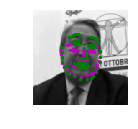

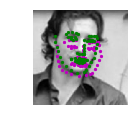

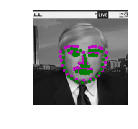

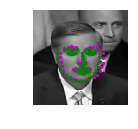

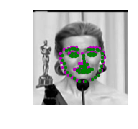

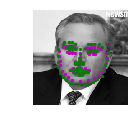

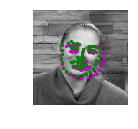

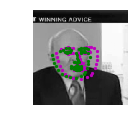

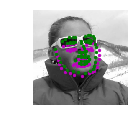

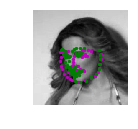

In [17]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [18]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I used Adam and SmoothL1Loss. Adam gives me a variety of hyperparameters that helped me such as B1, B2 and ϵ. I used the loss function as it is less sensitive to outliers than MSE which is usually used in regression problems.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I used Naimish architecture from the paper Facial Key Points Detection using Deep Convolutional Neural Network, 2017. The only I changed was the last 2 dense layers as I did not understand why making 1000 nodes to 1000 nodes was particularly interesting and the output is 136 values in this problem

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: I started with one epoch, then five epochs and I made sure that the model does not overfit and the accuracy increases. Finally I used 20 epochs to get the maximum accuracy but it turned out that 15 epochs would get the same resulton the same architecure.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.002214   -0.08925135 -0.06612786 -0.05949746]
 [ 0.01266234  0.01484884 -0.02241629 -0.01375418]
 [-0.05853115 -0.02099194  0.05046877 -0.0001206 ]
 [-0.00457844  0.07212923  0.07423346 -0.02047029]]
(4, 4)


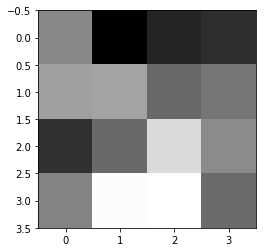

In [40]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

[[-0.01291579  0.05468683  0.04944449 -0.0230723 ]
 [ 0.01012297  0.01485619 -0.0104614  -0.042673  ]
 [-0.03519575 -0.01119106  0.03296566  0.00955741]
 [ 0.01999434  0.04061985  0.00311225  0.05880203]]
(4, 4)


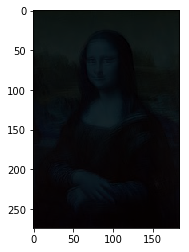

In [18]:
##TODO: load in and display any image from the transformed test dataset
import cv2
## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)


img = cv2.imread('mona_lisa-Copy1.jpg')
# plt.imshow(img, cmap="gray")

filtered_img = cv2.filter2D(img, -1, w[filter_index][0])
plt.imshow(filtered_img, cmap="gray")

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: It seems to be a bluring filter

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!